**Installing the environment**

In [11]:
!pip install gym==0.26.2
!pip install gym-notices
!pip install "gym[toy_text]" --no-deps

  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import random

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


**Creating the environment**

In [2]:
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="ansi")
state = env.reset()
print(env.render()) 


SFFF
FHFH
FFFH
HFFG



In [3]:
print("FrozenLake Environment")
print("----------------------")

FrozenLake Environment
----------------------


In [4]:
print("Number of states:", env.observation_space.n)
print("Number of actions:", env.action_space.n)
print("Actions: 0=Left, 1=Down, 2=Right, 3=Up")

Number of states: 16
Number of actions: 4
Actions: 0=Left, 1=Down, 2=Right, 3=Up


In [5]:
#Starting Grid 

print("\nInitial Grid:")
print(env.render())


Initial Grid:

SFFF
FHFH
FFFH
HFFG



In [6]:
# Q-table dimensions: [number of states x number of actions]
n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialize Q-table with zeros
Q = np.zeros((n_states, n_actions))

print("Q-table shape:", Q.shape)
print(Q)

Q-table shape: (16, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)  # explore
    else:
        return np.argmax(Q[state])           # exploit

In [8]:
# Hyperparameters learning, discont and exploration
alpha = 0.8       
gamma = 0.95      
epsilon = 1.0     
epsilon_min = 0.01
epsilon_decay = 0.995
n_episodes = 10000
max_steps = 100  

rewards_all_episodes = []

# Q-learning algorithm
for episode in range(n_episodes):
    state = env.reset()[0] 
    done = False
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state, Q, epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_all_episodes.append(total_reward)

print("Training finished.\n")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Training finished.



In [10]:
# Evaluating the trained Q-Learning agent 

n_test_episodes = 100
successes = 0

for episode in range(n_test_episodes):
    state = env.reset()[0]
    done = False

    for step in range(max_steps):
        action = np.argmax(Q[state])  
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state

        if done:
            if reward == 1:
                successes += 1
            break

initial_success = successes / n_test_episodes
print(f"Success rate over {n_test_episodes} episodes: {initial_success*100:.2f}%")


Success rate over 100 episodes: 61.00%


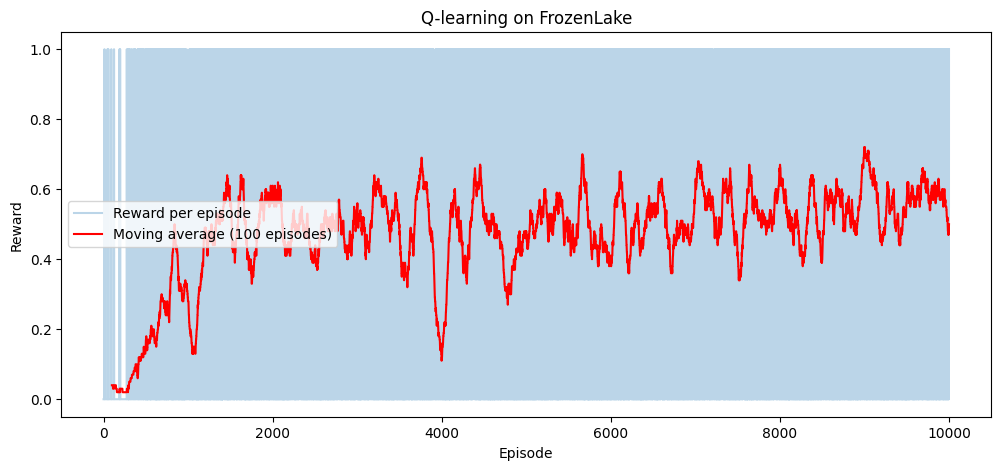

In [11]:
# Agennts learning curve over time
window = 100
moving_avg = np.convolve(rewards_all_episodes, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12,5))
plt.plot(rewards_all_episodes, label='Reward per episode', alpha=0.3)
plt.plot(range(window-1, n_episodes), moving_avg, label='Moving average (100 episodes)', color='red')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Q-learning on FrozenLake')
plt.legend()
plt.show()


In [16]:
# Optimized the hyperparameters
alpha = 0.9
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999
n_episodes = 50000
max_steps = 100

In [17]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
rewards_all_episodes = []

for episode in range(n_episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0

    for step in range(max_steps):
        action = choose_action(state, Q, epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_all_episodes.append(total_reward)

print("Training finished.\n")

# Evaluate the training agent 
n_test_episodes = 100
successes = 0
for episode in range(n_test_episodes):
    state = env.reset()[0]
    done = False
    for step in range(max_steps):
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state
        if done:
            if reward == 1:
                successes += 1
            break

success_rate = successes / n_test_episodes
print(f"Success rate over {n_test_episodes} episodes: {success_rate*100:.2f}%")


Training finished.

Success rate over 100 episodes: 72.00%


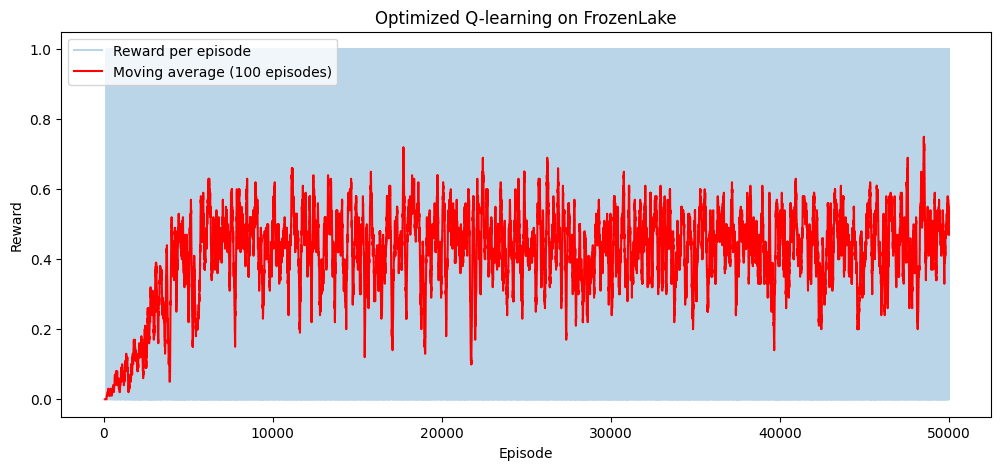

In [18]:
# Agennts learning curve over time
window = 100
moving_avg = np.convolve(rewards_all_episodes, np.ones(window)/window, mode='valid')
plt.figure(figsize=(12,5))
plt.plot(rewards_all_episodes, alpha=0.3, label='Reward per episode')
plt.plot(range(window-1, n_episodes), moving_avg, color='red', label='Moving average (100 episodes)')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Optimized Q-learning on FrozenLake')
plt.legend()
plt.show()

In [19]:
import time

#Visualizing how the agent moves from the start goal to the end

def play_episode(env, Q, max_steps=100, sleep=0.5):
    state = env.reset()[0]
    done = False
    total_reward = 0
    step_count = 0

    print(env.render())  
    time.sleep(sleep)

    while not done and step_count < max_steps:
        action = np.argmax(Q[state])  
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state
        total_reward += reward
        step_count += 1

        print(env.render()) 
        time.sleep(sleep)

    if reward == 1:
        print(f"Goal reached in {step_count} steps! ✅ Total reward: {total_reward}")
    else:
        print(f"Episode ended without reaching goal. ❌ Total reward: {total_reward}")

# Play one episode
play_episode(env, Q, max_steps=100, sleep=0.3)



SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Up)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HF

In [20]:
print(f"Initial hyperparameters success rate: {initial_success*100:.2f}%")
print(f"Optimized hyperparameters success rate: {success_rate*100:.2f}%")


Initial hyperparameters success rate: 61.00%
Optimized hyperparameters success rate: 72.00%


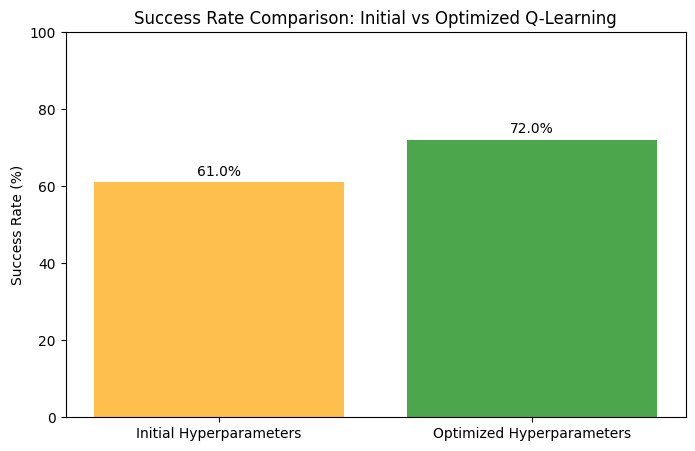

In [31]:
#Vizualise the sucess rate 

initial_success = 0.61  
optimized_success = 0.72

labels = ['Initial Hyperparameters', 'Optimized Hyperparameters']
success_rates = [initial_success*100, optimized_success*100]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, success_rates, color=['orange', 'green'], alpha=0.7)
plt.ylabel('Success Rate (%)')
plt.title('Success Rate Comparison: Initial vs Optimized Q-Learning')
plt.ylim(0, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

plt.show()

In [23]:
Q_df = pd.DataFrame(Q, columns=['Left','Down','Right','Up'])
print("Trained Q-table:")
print(Q_df)


Trained Q-table:
        Left          Down     Right            Up
0   0.672230  3.044224e-01  0.308344  6.537699e-01
1   0.019648  1.639413e-04  0.010802  7.521121e-01
2   0.020648  2.000440e-01  0.226768  6.934659e-01
3   0.002697  2.534060e-02  0.017477  2.446801e-01
4   0.689147  1.422390e-02  0.071223  6.721396e-01
5   0.000000  0.000000e+00  0.000000  0.000000e+00
6   0.000002  5.494596e-12  0.029045  5.736407e-07
7   0.000000  0.000000e+00  0.000000  0.000000e+00
8   0.086143  6.830272e-02  0.057886  4.126413e-01
9   0.075403  8.315870e-01  0.000009  8.464899e-02
10  0.288130  9.560122e-02  0.006558  2.635460e-03
11  0.000000  0.000000e+00  0.000000  0.000000e+00
12  0.000000  0.000000e+00  0.000000  0.000000e+00
13  0.084885  7.893874e-02  0.962343  9.532722e-02
14  0.087376  9.961660e-01  0.531939  8.133130e-01
15  0.000000  0.000000e+00  0.000000  0.000000e+00
